In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Full Matrix

In [2]:
# Full Matrices
panteli = pd.read_csv("./full-distances/panteli.csv", header=None)
cantometrics = pd.read_csv("./full-distances/CantometricsDistNominal.csv")
cantometrics_ordinal = pd.read_csv("./full-distances/CantometricsDistOrdinal.csv")
musly = pd.read_csv("./full-distances/musly.csv", header=None)

cantometrics = pd.DataFrame(squareform(pdist(cantometrics)))

In [3]:
full_distance = np.zeros((4,4))

In [4]:
cantometrics_ordinal=cantometrics_ordinal.drop(labels=["Unnamed: 0"], axis=1)

In [5]:
import skbio.stats.distance as skb
from skbio import DistanceMatrix

In [6]:
# Panteli Canto Nominal
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,1] = p_value
full_distance[1,0] = coeff

In [7]:
# Panteli Canto Ordinal
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics_ordinal))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,2] = p_value
full_distance[2,0] = coeff

In [8]:
# Panteli musly
x = DistanceMatrix(pd.DataFrame.to_numpy(panteli))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[0,3] = p_value
full_distance[3,0] = coeff

In [9]:
# Canto canto-ordinal
x = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
y = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics_ordinal))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[1,2] = p_value
full_distance[2,1] = coeff

In [10]:
# Canto musly
x = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[1,3] = p_value
full_distance[3,1] = coeff

In [11]:
# canto-ordinal musly
x = DistanceMatrix(pd.DataFrame.to_numpy(cantometrics_ordinal))
y = DistanceMatrix(pd.DataFrame.to_numpy(musly))
coeff, p_value, n = skb.mantel(x, y, alternative="greater")
full_distance[2,3] = p_value
full_distance[3,2] = coeff

In [12]:
full_distance

array([[ 0.        ,  0.57      ,  0.842     ,  0.001     ],
       [-0.02376016,  0.        ,  0.087     ,  0.784     ],
       [-0.07939848,  0.07662402,  0.        ,  0.015     ],
       [ 0.3316192 , -0.04757825,  0.13442422,  0.        ]])

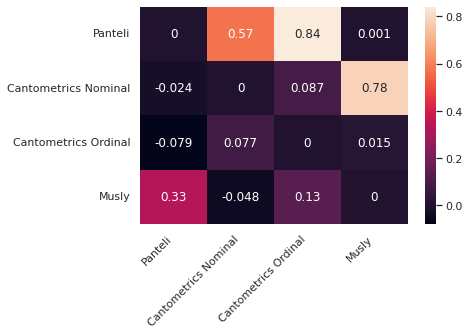

In [13]:
sns.set()
g = sns.heatmap(full_distance, annot=True)
# To display the heatmap 
ticks = ["Panteli","Cantometrics Nominal","Cantometrics Ordinal", "Musly"]
# plt.xticks(np.arange(5),("Panteli","Cantometrics Nominal","Cantometrics Nominal", "Musly"),rotation="45")
# plt.yticks(np.arange(5),("Panteli","Cantometrics Nominal","Cantometrics Nominal", "Musly"), rotation="horizontal")
plt.margins(0.2)
g.set_xticklabels(ticks, rotation=45, horizontalalignment='right')
g.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
# ax = plt.axes()
# ax.set_title('Full Distance Matrix Comparison', fontsize=16)
plt.show()

# Partial Matrices Flattened

In [24]:
# Partial Matrices
panteli_partial = pd.read_csv("./partial-distances/panteli_partial.csv", header=None)
canto_partial = pd.read_csv("./partial-distances/canto_dist_nom_part.csv").drop(columns=["Unnamed: 0"])
canto_partial_ordinal = pd.read_csv("./partial-distances/canto_dist_ord_part.csv").drop(columns=["Unnamed: 0"])
pairwise_partial = pd.read_csv("./partial-distances/pairwise_partial.csv", header=None)
musly_partial = pd.read_csv("./partial-distances/musly_partial.csv",header=None)

In [25]:
def flatten_distance_matrix(numpy_array):
    arr = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
    return arr

def flatten(df):
    input_array = df.to_numpy()
    z = []
    for i in range(6):
        x = flatten_distance_matrix(input_array[i*5:i*5+5, i*5:i*5+5])
        z.extend(x)
    return z

In [26]:
panteli_partial = flatten(panteli_partial)
canto_partial = flatten(canto_partial)
canto_partial_ordinal = flatten(canto_partial_ordinal)
pairwise_partial = flatten(pairwise_partial)
musly_partial = flatten(musly_partial)

In [27]:
import math
canto_partial = [0 if math.isnan(x) else x for x in canto_partial]
canto_partial_ordinal = [0 if math.isnan(x) else x for x in canto_partial_ordinal]

## Mantel Test

In [42]:
# shuffle one of the two arrays with n permutations
def permutations(a, b, statistic, n):
    p_values = []
    for i in range(n):
        c = random.sample(b, len(b))
        if(len(a)==len(c)):
            res = sp.pearsonr(a,c)
            if(res[1]<statistic):
                p_values.append(res[1])
        else:
            print("Error! array lengths are not the same")
            return
    return p_values

In [43]:
def mantel(a, b):
    n = 1000
    statistics = sp.pearsonr(a,b)
    statistic = statistics[1]
    results = permutations(list(a),list(b),statistic, n)
    Sum_p = sum(results)
    sig = (Sum_p+1)/(n+1)
    # signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
    return statistics[0], sig, n

# Individual Partial Matrices

In [36]:
from skbio import DistanceMatrix
import seaborn as sns
import random

In [37]:
def visualize_distance_matrix(group_no, data):
    group_no = str(group_no)
    sns.set()
    g = sns.heatmap(data, annot=True)
    # To display the heatmap 
    import matplotlib.pyplot as plt
    ticks = ["Panteli","Cantometrics Nominal", "Cantometrics Ordinal", "Pairwise", "Musly"]
    plt.margins(0.2)
    # plt.gcf().subplots_adjust(bottom=0.25)
    g.set_xticklabels(ticks, rotation=45, horizontalalignment='right')
    g.set_yticklabels(ticks, rotation=0, horizontalalignment='right')
#     ax = plt.axes()
#     ax.set_title('Partial Distance Matrix Group '+group_no, fontsize=16)
#     plt.savefig("./figs/partial-distance-matrices/partial_dist_"+group_no+".png")
    plt.show()

In [38]:
def populate_matrix(panteli_partial, canto_partial, canto_partial_ordinal, pairwise_partial, musly_partial):
    
    partial = np.zeros((5,5))

    # Panteli Canto Nominal
    x = panteli_partial
    y = canto_partial
    coeff, p_value, n = mantel(x, y)
    partial[0,1] = p_value
    partial[1,0] = coeff
    
    # Panteli Canto Ordinal
    x = panteli_partial
    y = canto_partial_ordinal
    coeff, p_value, n = mantel(x, y)
    partial[0,2] = p_value
    partial[2,0] = coeff

    # Panteli Pairwise
    x = panteli_partial
    y = pairwise_partial
    coeff, p_value, n = mantel(x, y)
    partial[0,3] = p_value
    partial[3,0] = coeff

    # Panteli Musly
    x = panteli_partial
    y = musly_partial
    coeff, p_value, n = mantel(x, y)
    partial[0,4] = p_value
    partial[4,0] = coeff

     # Canto Canto Ordinal
    x = canto_partial
    y = canto_partial_ordinal
    coeff, p_value, n = mantel(x, y)
    partial[1,2] = p_value
    partial[2,1] = coeff
    
    # Canto Pairwise
    x = canto_partial
    y = pairwise_partial
    coeff, p_value, n = mantel(x, y)
    partial[1,3] = p_value
    partial[3,1] = coeff

    # Canto Musly
    x = canto_partial
    y = musly_partial
    coeff, p_value, n = mantel(x, y)
    partial[1,4] = p_value
    partial[4,1] = coeff
    
     # Canto Ordinal Pairwise
    x = canto_partial_ordinal
    y = pairwise_partial
    coeff, p_value, n = mantel(x, y)
    partial[2,3] = p_value
    partial[3,2] = coeff
    
    # Canto Ordinal Musly
    x = canto_partial_ordinal
    y = musly_partial
    coeff, p_value, n = mantel(x, y)
    partial[2,4] = p_value
    partial[4,2] = coeff

    # Pairwise Musly
    x = pairwise_partial
    y = musly_partial
    coeff, p_value, n = mantel(x, y)
    partial[3,4] = p_value
    partial[4,3] = coeff
    

    return partial

60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60


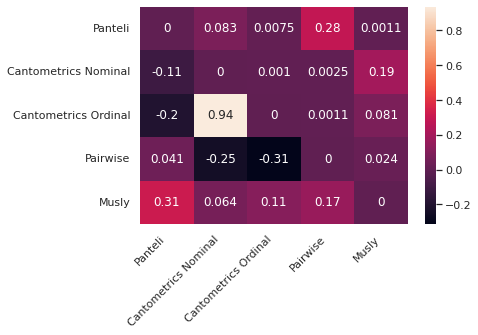

In [39]:
partial = populate_matrix(panteli_partial, canto_partial, canto_partial_ordinal, pairwise_partial, musly_partial)
visualize_distance_matrix(1,partial)

In [41]:
x = musly_partial
y = musly_partial
mantel(x, y)

60 60


(1.0, 0.000999000999000999, 1000)

## Scatter Plots

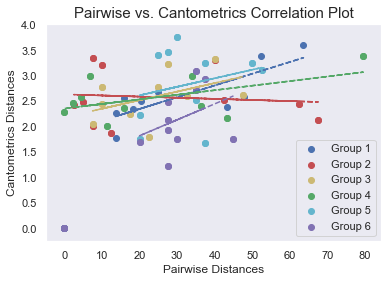

<Figure size 432x288 with 0 Axes>

In [166]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

fig = plt.figure()
ax1 = fig.add_subplot(111)

b, m = polyfit(flatten(pairwise_partial_1), flatten_df(canto_partial_1), 1)
flat = flatten(pairwise_partial_1)
ax1.scatter(flat, flatten_df(canto_partial_1), c='b', label='Group 1')
ax1.plot(flat, b+[x*m for x in flat], "b--")


b, m = polyfit(flatten(pairwise_partial_2), flatten_df(canto_partial_2), 1)
flat = flatten(pairwise_partial_2)
ax1.scatter(pairwise_partial_2, canto_partial_2, c='r', label='Group 2')
ax1.plot(flat, b+[x*m for x in flat],"r--",)

b, m = polyfit(flatten(pairwise_partial_3), flatten_df(canto_partial_3), 1)
flat = flatten(pairwise_partial_3)
ax1.scatter(pairwise_partial_3, canto_partial_3, c='y', label='Group 3')
ax1.plot(flat, b+[x*m for x in flat],"--", c="y")

b, m = polyfit(flatten(pairwise_partial_4), flatten_df(canto_partial_4), 1)
flat = flatten(pairwise_partial_4)
ax1.scatter(pairwise_partial_4, canto_partial_4, c='g', label='Group 4')
ax1.plot(flat, b+[x*m for x in flat],"--",c="g")


b, m = polyfit(flatten(pairwise_partial_5), flatten_df(canto_partial_5), 1)
flat = flatten(pairwise_partial_5)
ax1.scatter(pairwise_partial_5, canto_partial_5, c='c', label='Group 5')
ax1.plot(flat, b+[x*m for x in flat],"--",c="c")

b, m = polyfit(flatten(pairwise_partial_6), flatten_df(canto_partial_6), 1)
flat = flatten(pairwise_partial_6)
ax1.scatter(pairwise_partial_6, canto_partial_6, c='m', label='Group 6')
ax1.plot(flat, b+[x*m for x in flat],"--",c="m")

ax1.grid(False)

plt.xlabel("Pairwise Distances");
plt.ylabel("Cantometrics Distances")
plt.title("Pairwise vs. Cantometrics Correlation Plot", fontsize=15)
plt.legend(loc='lower right');
plt.show()

plt.savefig("./figs/scatter.png")